In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [79]:
[1,2,3,4][0:-0]

[2, 3]

In [191]:
class Correlator:
    
    def __init__(self):
        self.image = None
        self.filter = None

    def __padding(self, horizontal_padding, vertical_padding):
        padded_image = np.zeros((self.image.shape[0] + 2 * vertical_padding, self.image.shape[1] + 2 * horizontal_padding, 3))
        
        if vertical_padding == 0:
            padded_image[:, horizontal_padding : -horizontal_padding, :] = self.image 
        elif horizontal_padding == 0:
            padded_image[vertical_padding : -vertical_padding, :, :] = self.image 
        else:
            padded_image[vertical_padding : -vertical_padding, horizontal_padding : -horizontal_padding, :] = self.image 
    
        return padded_image
        
    def apply_correlation(self, image_path, filter_matrix, zero_padding = True, normalization = False):
        self.image = np.asarray(Image.open(image_path).convert('RGB'))
        self.filter = filter_matrix

        epsilon = 1e-7
        
        vertical_padding = self.filter.shape[0]//2
        horizontal_padding = self.filter.shape[1]//2
        
        if not horizontal_padding and not vertical_padding:
            print("Could not execute padding due to filter shape. Try a Bi dimensional kernel.")
            zero_padding = False
        
        if zero_padding:
            preprocessed_img = self.__padding(horizontal_padding, vertical_padding)
            output = np.zeros((self.image.shape[0], self.image.shape[1], 3))
        else:
            preprocessed_img = self.image
            output = np.zeros((self.image.shape[0] - 2 * vertical_padding, self.image.shape[1] - 2 * horizontal_padding, 3))
    
        if not normalization:
            for i in range(preprocessed_img.shape[0] - self.filter.shape[0]):
                for j in range(preprocessed_img.shape[1] - self.filter.shape[1]):
                    for k in range(3):
                        output[i,j,k] = np.sum(np.multiply(self.filter, preprocessed_img[i: i + self.filter.shape[0], j: j + self.filter.shape[1], k]))
        else:
            filter_diff = self.filter - np.mean(self.filter)
            normalized_filter = filter_diff/np.sum(np.abs(filter_diff + epsilon))
            if np.argmax(normalized_filter) == 0:
                print("Warning : Filter has mean zero. Normalization will result in a black image.")

            for i in range(preprocessed_img.shape[0] - self.filter.shape[0]):
                for j in range(preprocessed_img.shape[1] - self.filter.shape[1]):
                    for k in range(3):
                        window = preprocessed_img[i: i + self.filter.shape[0], j: j + self.filter.shape[1], k]
                        window_diff = window - np.mean(window)
                        output[i,j,k] = np.sum(np.multiply((window_diff)/np.sum(np.abs(window_diff + epsilon)), normalized_filter))
            
        return self.image, preprocessed_img, output

In [196]:
c = Correlator()

filter_matrix = np.ones((9,9))/81

original, padded_image, output = c.apply_correlation("../app/assets/Imagens_teste/einstein.png", filter_matrix, zero_padding=True, normalization = False)

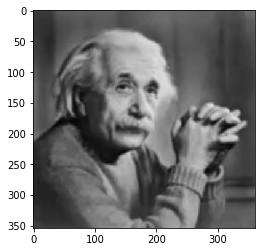

In [197]:
plt.imshow(original.astype(int))

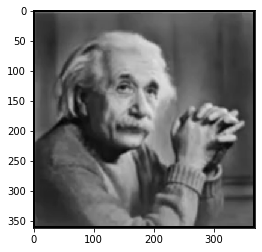

In [198]:
plt.imshow(padded_image.astype(int))

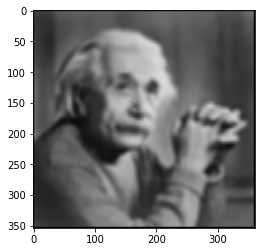

In [199]:
plt.imshow(output.astype(int))